# Predicting Online Shopping Behavior

E-commerce websites want to be able to identify the users that intend to follow through on a transaction so that they can deliver customized content to those users.

The data at https://datasci112.stanford.edu/data/online_shopping/train.csv contains information about users on an e-commerce website. [This data set originally came from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset).] Each row represents a unique user on a specific webpage. The variables include:

- how many visits to and total duration spent on
    - administrative pages
    - informational pages
    - product-related pages
- features from Google Analytics about the webpage that they are on, such as
    - bounce rate: of the visitors who enter the site from the page, the proportion that leave the site immediately afterwards
    - exit rate: of all visitors to the page, the percentage that leave th site immediately afterwards
    - page value: a [Google Analytics metric](https://support.google.com/analytics/answer/2695658?hl=en) that measures the value of a webpage.

The goal is to predict whether or not each session resulted in a **`Purchase`**.

In [2]:
# ! cd data/online_shopping/ && wget https://datasci112.stanford.edu/data/online_shopping/train.csv
import pandas as pd
df = pd.read_csv("data/online_shopping/train.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,no
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,no
2,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,no
3,0,0.00,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,no
4,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,0,no
6326,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,0,no
6327,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,no
6328,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,no


## Exercise 1

Let's restrict our attention to just a few candidate features, all of which are quantitative.

Fit different $9$-nearest neighbors models to predict whether or not each session resulted in a purchase. Which combination of features produces the optimal (test) accuracy?

In [3]:
candidate_features = [
    "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues"]

How many possible combinations of features are there?

To iterate over all possible combinations of features, you can use `itertools.combinations`, which produces a list of all combinations of a given size. For example, to get a list of all 15 combinations of 4 variables, we could write the following code.

In [16]:
from itertools import combinations

for features in combinations(candidate_features, 4):
    print(features)

    # Note that `features` is a tuple.
    # You will need to convert it to a list to subset your `DataFrame`.
    df[list(features)]

('Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates')
('Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates')
('Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues')
('Administrative_Duration', 'Informational_Duration', 'BounceRates', 'ExitRates')
('Administrative_Duration', 'Informational_Duration', 'BounceRates', 'PageValues')
('Administrative_Duration', 'Informational_Duration', 'ExitRates', 'PageValues')
('Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates')
('Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'PageValues')
('Administrative_Duration', 'ProductRelated_Duration', 'ExitRates', 'PageValues')
('Administrative_Duration', 'BounceRates', 'ExitRates', 'PageValues')
('Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates')
('Informational_Duration', 'ProductRelated_Duration', 'BounceRates',

In [ ]:
# TODO: define the k-nearest neighbors model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from itertools import combinations

X_train = df[candidate_features]
y_train = df["Purchase"]

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))
pipeline.fit(X_train, y_train)

accuracies = {}
# TODO: iterate over all sizes
for size in range(1, len(candidate_features) + 1):
    # TODO: iterate over all feature combinations of a given size
    for features in combinations(candidate_features, size):
        feature_string = ",".join(features)
        # TODO: estimate test error for a model with the given features
        # How can we choice the best k in k-fold cross-validation?
        # Ref: https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation
        X_train_subset = df[list(features)]
        pipeline.fit(X_train_subset, y_train)
        accuracies[feature_string] = cross_val_score(
            pipeline, 
            X=X_train_subset, y=y_train, 
            scoring="accuracy", 
            cv=10
        ).mean()

# Sort the accuracies.
accuracies_sorted = pd.Series(accuracies).sort_values(ascending=False)
accuracies_sorted

ProductRelated_Duration,BounceRates,ExitRates,PageValues                                                   0.891943
Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues    0.889889
Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues              0.889731
Administrative_Duration,ProductRelated_Duration,ExitRates,PageValues                                       0.889415
Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues                0.889415
                                                                                                             ...   
Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates               0.835071
Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates                         0.834439
ProductRelated_Duration,BounceRates,ExitRates                           

In [20]:
# TODO: Determine the best set of features to maximize accuracy
best_features_accuracy = accuracies_sorted.index[0]
best_features_accuracy

'ProductRelated_Duration,BounceRates,ExitRates,PageValues'

## Exercise 2

Continue to fit $9$-nearest neighbors models. Which combination of features produces the optimal (test) F1 score (averaged over the classes)?

Is it the same as the combination that produced the optimal accuracy?

_Hint:_ Copy and paste your code from Exercise 1 and adapt it. Consider the `scoring` argument to [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
f1_score = {}
# TODO: iterate over all sizes
for size in range(1, len(candidate_features) + 1):
    # TODO: iterate over all feature combinations of a given size
    for features in combinations(candidate_features, size):
        feature_string = ",".join(features)
        # TODO: estimate test error for a model with the given features
        # How can we choice the best k in k-fold cross-validation?
        # Ref: https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation
        X_train_subset = df[list(features)]
        pipeline.fit(X_train_subset, y_train)
        f1_score[feature_string] = cross_val_score(
            pipeline, 
            X=X_train_subset, y=y_train, 
            scoring="f1_macro", 
            cv=10
        ).mean()

# Sort the f1-scores.
f1_score_sorted = pd.Series(f1_score).sort_values(ascending=False)
f1_score_sorted

ProductRelated_Duration,BounceRates,ExitRates,PageValues      0.764684
ProductRelated_Duration,ExitRates,PageValues                  0.760483
ProductRelated_Duration,BounceRates,PageValues                0.757678
BounceRates,PageValues                                        0.757631
BounceRates,ExitRates,PageValues                              0.757147
                                                                ...   
Administrative_Duration,Informational_Duration,BounceRates    0.473774
Informational_Duration                                        0.472960
Administrative_Duration                                       0.470184
Informational_Duration,ProductRelated_Duration                0.469733
BounceRates                                                   0.464436
Length: 63, dtype: float64

In [24]:
# TODO: Determine the best set of features to maximize F1 score
best_features_f1 = f1_score_sorted.index[0]
best_features_f1

'ProductRelated_Duration,BounceRates,ExitRates,PageValues'

In [ ]:
# compare the best_features_accuracy and best_features_f1 (compare contents only)
from collections import Counter
print (Counter(best_features_accuracy) == Counter(best_features_f1))

True


## Exercise 3

For the feature combination that you found in Exercise 1, find the value of $k$ that optimizes (test) accuracy.

For the feature combination that you found in Exercise 2, find the value of $k$ that optimizes (test) F1 score.


In [57]:
# do grid search for find the best k value optimizes (test) accuracy
from sklearn.model_selection import GridSearchCV

best_features = best_features_f1.split(',')
X_train_best = df[best_features]
y_train = df['Purchase']

grid_cv_accuracy = GridSearchCV(
    pipeline,
    param_grid={
        'kneighborsclassifier__n_neighbors': range(1, 10),
        'kneighborsclassifier__metric': ['euclidean', 'manhattan']
    },
    scoring='accuracy',
    cv=10
)
grid_cv_accuracy.fit(X_train_best, y_train)
grid_cv_accuracy.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 9}

In [52]:
# do grid search for find the best k value optimizes (test) accuracy
from sklearn.model_selection import GridSearchCV

best_features = best_features_f1.split(',')
X_train_best = df[best_features]
y_train = df['Purchase']

grid_cv_f1 = GridSearchCV(
    pipeline,
    param_grid={
        'kneighborsclassifier__n_neighbors': range(1, 10),
        'kneighborsclassifier__metric': ['euclidean', 'manhattan']
    },
    scoring='f1_macro',
    cv=10
)
grid_cv_f1.fit(X_train_best, y_train)
grid_cv_f1.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 9}

## Exercise 4

Take the best models (based on accuracy and F1 score) that you found in Exercise 3, and graph the training precision-recall curves. How do the two models compare?

_Hint:_ If you used `GridSearchCV` to optimize $k$, it refits the best model by default and stores it as `GridSearchCV.best_estimator_`. You can call `.predict` or `.predict_proba` on this directly.

Text(0, 0.5, 'precision')

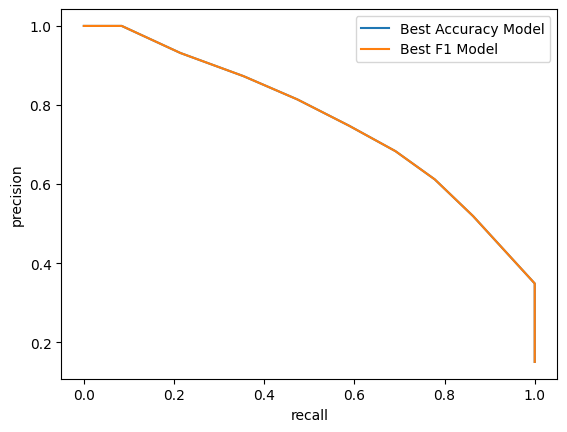

In [ ]:
# TODO: Calculate precision-recall curve for the optimal accuracy model.
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_train,
    grid_cv_accuracy.best_estimator_.predict_proba(X_train_best)[:, 1],
    pos_label='yes'
)

# Graph the precision-recall curve, label it "Best Accuracy Model".
ax = pd.DataFrame({
    "recall": recall,
    "precision": precision
}).plot.line(x="recall", y="precision", label="Best Accuracy Model")

# TODO: Calculate precision-recall curve for the optimal F1 model.

precision, recall, thresholds = precision_recall_curve(
    y_train,
    grid_cv_f1.best_estimator_.predict_proba(X_train_best)[:, 1],
    pos_label='yes'
)

# Graph this precision-recall curve on the same axes as the last curve.
ax = pd.DataFrame({
    "recall": recall,
    "precision": precision
}).plot.line(ax=ax, x="recall", y="precision", label="Best F1 Model")
ax.set_ylabel("precision")

- scoring='accuracy'와 scoring='f1_macro'일 때의 feature set이 완벽하게 일치하다 보니 그래프도 일치하게 됨 
- cv 갯수를 변경하게 되면 조금 다른 양상이 나타날 것으로 기대됨

## Bonus Exercise

What if we wanted to estimate the test precision-recall curve? We would need held-out validation data. Validation data is available at https://datasci112.stanford.edu/data/online_shopping/val.csv.

Use the validation data to graph the test precision-recall curve.

_Hint:_ Copy and paste your code from Exercise 4 and adapt appropriately.

In [59]:
! cd data/online_shopping/ && wget https://datasci112.stanford.edu/data/online_shopping/val.csv
df_val = pd.read_csv("data/online_shopping/val.csv")
df_val

--2025-08-19 12:22:24--  https://datasci112.stanford.edu/data/online_shopping/val.csv
Resolving datasci112.stanford.edu (datasci112.stanford.edu)... 54.81.116.232
Connecting to datasci112.stanford.edu (datasci112.stanford.edu)|54.81.116.232|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://web.stanford.edu/class/datasci112//data/online_shopping/val.csv [following]
--2025-08-19 12:22:26--  https://web.stanford.edu/class/datasci112//data/online_shopping/val.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 523905 (512K) [text/csv]
Saving to: ‘val.csv’

val.csv             100%[===================>] 511.63K   299KB/s    in 1.7s    

2025-08-19 12:22:28 (299 KB/s) - ‘val.csv’ saved [523905/523905]



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,1,0.000000,3,69.0,15,352.875000,0.000000,0.055556,0.000000,0.0,Aug,2,2,3,2,Returning_Visitor,0,no
1,2,47.666667,0,0.0,83,3025.283333,0.000000,0.006504,28.941805,0.2,May,2,2,7,3,Returning_Visitor,0,no
2,3,107.428571,0,0.0,59,1843.187696,0.014386,0.041993,5.715623,0.0,Dec,2,2,7,7,Returning_Visitor,1,no
3,2,40.200000,2,26.1,10,186.700000,0.000000,0.021429,0.000000,0.0,Oct,2,2,3,3,New_Visitor,0,no
4,0,0.000000,0,0.0,153,4565.930621,0.001307,0.006432,6.189215,0.0,Aug,2,2,4,1,Returning_Visitor,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0.000000,0,0.0,1,56.500000,0.000000,0.100000,0.000000,0.0,Nov,2,2,3,3,Returning_Visitor,0,no
5996,0,0.000000,0,0.0,2,138.500000,0.000000,0.100000,0.000000,0.0,Nov,3,2,4,11,Returning_Visitor,1,no
5997,0,0.000000,2,84.5,42,2762.408333,0.004545,0.025152,0.000000,0.0,Nov,2,2,1,2,New_Visitor,0,no
5998,1,75.000000,2,34.5,100,4436.376299,0.000000,0.007151,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,0,yes


Text(0, 0.5, 'precision')

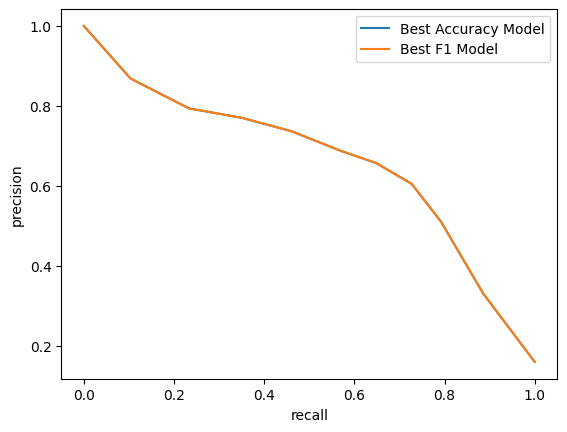

In [60]:
# TODO: Calculate precision-recall curve for the optimal accuracy model.
from sklearn.metrics import precision_recall_curve

X_val = df_val[best_features]
y_val = df_val['Purchase']

precision, recall, thresholds = precision_recall_curve(
    y_val,
    grid_cv_accuracy.best_estimator_.predict_proba(X_val)[:, 1],
    pos_label='yes'
)

# Graph the precision-recall curve, label it "Best Accuracy Model".
ax = pd.DataFrame({
    "recall": recall,
    "precision": precision
}).plot.line(x="recall", y="precision", label="Best Accuracy Model")

# TODO: Calculate precision-recall curve for the optimal F1 model.

precision, recall, thresholds = precision_recall_curve(
    y_val,
    grid_cv_f1.best_estimator_.predict_proba(X_val)[:, 1],
    pos_label='yes'
)

# Graph this precision-recall curve on the same axes as the last curve.
ax = pd.DataFrame({
    "recall": recall,
    "precision": precision
}).plot.line(ax=ax, x="recall", y="precision", label="Best F1 Model")
ax.set_ylabel("precision")